In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
data = pd.read_csv('genus_table_Umar_MPD.csv')
metadata = pd.read_csv('P8_C_F.csv')
# Low count filter parameters
min_count = 4  # Minimum count threshold
prevalence_threshold = 0.2  # Prevalence threshold (20%)
# Convert non-numeric values to NaN
# Convert data values to numeric type
data[data.columns[1:]] = data[data.columns[1:]].apply(pd.to_numeric, errors='coerce')

print(data)

# Filter based on minimum count
data_filtered = data.loc[:, (data.gt(min_count).sum() >= prevalence_threshold * data.shape[0])]
print(data_filtered)
# Filter based on mean or median values
mean_values = data_filtered.mean()
median_values = data_filtered.median()
data_filtered = data_filtered.loc[:, (mean_values.ge(min_count)) | (median_values.ge(min_count))]

print(data_filtered)

                                                  #NAME      1      2      3  \
0     Bacteria;Firmicutes;Bacilli;Lactobacillales;La...  79024  68214  75562   
1     Bacteria;Proteobacteria;Gammaproteobacteria;En...    112    119     87   
2     Bacteria;Proteobacteria;Gammaproteobacteria;Pa...   1437   1060   1513   
3     Bacteria;Firmicutes;Bacilli;Bacillales;Staphyl...   1673   3455   3156   
4     Bacteria;Firmicutes;Clostridia;Clostridiales;C...      0      0      0   
...                                                 ...    ...    ...    ...   
1025  Bacteria;Proteobacteria;Gammaproteobacteria;Ps...      0      0      0   
1026  Bacteria;Firmicutes;Bacilli;Bacillales;Bacilla...      0      0      0   
1027  Bacteria;Proteobacteria;Gammaproteobacteria;Be...      0      0      0   
1028  Eukaryota;Euglenozoa;Kinetoplastea;Metakinetop...      0      0      0   
1029  Bacteria;Proteobacteria;Alphaproteobacteria;Az...      0      0      0   

          4      5      6      7      8

In [108]:

data = pd.read_csv('genus_table_Umar_MPD.csv')
metadata = pd.read_csv('P8_C_F.csv')
data = data[(data != 0).sum(axis=1) >= data.shape[1] / 2]
label_mapping = dict(zip(metadata['#NAME'], metadata['Experiment']))
data_colunms = data.columns[1:]
new_columns = []
for column_name in data_colunms:
    str_column_name = int(column_name)
    if str_column_name in label_mapping:
        new_columns.append(label_mapping[str_column_name])
    else:
        new_columns.append(str_column_name)
data.columns = ['#NAME'] + new_columns
# Extract the feature names and mean decrease accuracy values
df = data.drop("#NAME", axis=1)  # Replace 'target_variable' with the column name of your target variable
split_df = pd.concat([data['#NAME'].str.split(';', expand=True)], axis=1)
split_df.columns = ['Column_1', 'Column_2', 'Column_3','Column_4', 'Column_5','Column_6']
columns_to_remove = ['Column_1', 'Column_2', 'Column_3','Column_4', 'Column_5']
data = pd.concat([split_df,df], axis=1)
data = data[data['Column_6'] != 'NA']
data = data.drop(columns=columns_to_remove)
data = data.T
new_columns = data.iloc[0]
data = data[1:]
data.columns = new_columns
data = data.reset_index().rename(columns={"index": "Experiment"})
# Separate the features (X) and the target variable (y)
X = data.drop('Experiment', axis=1)  # Replace 'target_variable' with the column name of your target variable
y = data['Experiment']  # Replace 'target_variable' with the column name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=500)
# Train the classifier on the training data
pre = rf.fit(X_train, y_train)
# # Make predictions on the test set
predictions = rf.predict(X_test)

# Print the predicted values
print("Predicted values:", predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

from sklearn.metrics import classification_report

# Calculate precision, recall, and f1-score
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Calculate the feature importances (mean decrease accuracy)
feature_importances = rf.feature_importances_
# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=True)

# Print the feature importances and label names
print("Feature Importances:")
for index, row in importance_df.iterrows():
    label = label_mapping.get(row['Feature'], row['Feature'])
    print(f"{label}: {row['Importance']}")
    


Predicted values: ['F' 'C' 'F' 'F' 'F' 'F' 'C' 'F' 'F' 'F']
Accuracy: 1.0
Confusion Matrix:
[[2 0]
 [0 8]]
Classification Report:
              precision    recall  f1-score   support

           C       1.00      1.00      1.00         2
           F       1.00      1.00      1.00         8

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Feature Importances:
Clostridium_sensu_stricto_9: 0.00039399179961839814
Anaerotruncus: 0.0007144317620096169
Proteus: 0.0009707912457912458
Tabrizicola: 0.001041689190296002
Achromobacter: 0.001548606906877584
Taonella: 0.0017701829754738962
Runella: 0.002109795469759039
Pseudacidovorax: 0.002373825085589792
Citrobacter: 0.0026297227063629
Lysinibacillus: 0.0032941747351114365
Staphylococcus: 0.0035025726122433765
Aeromonas: 0.0038310653891956903
Oscillibacter: 0.0038399461130868453
Novosphingobium: 0.00416329431675686
Zoogloea: 0.00453

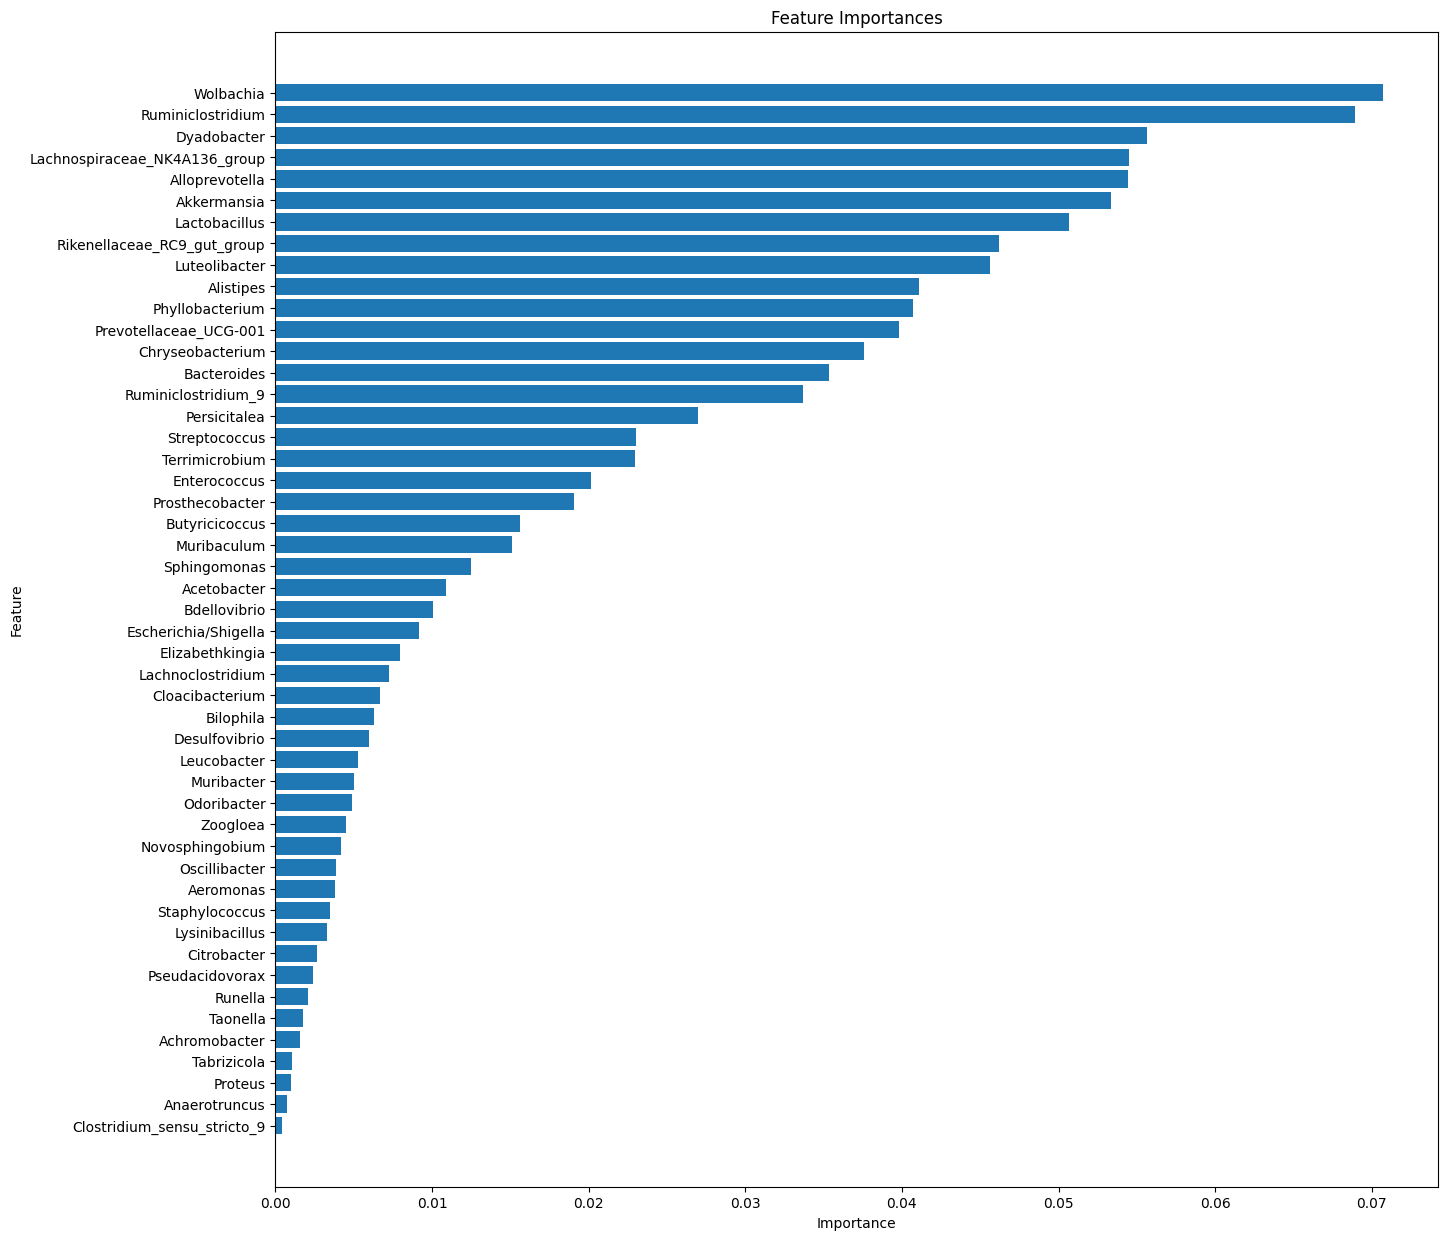

In [109]:
# Plot the feature importances
plt.figure(figsize=(15, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Show the plot
plt.show()


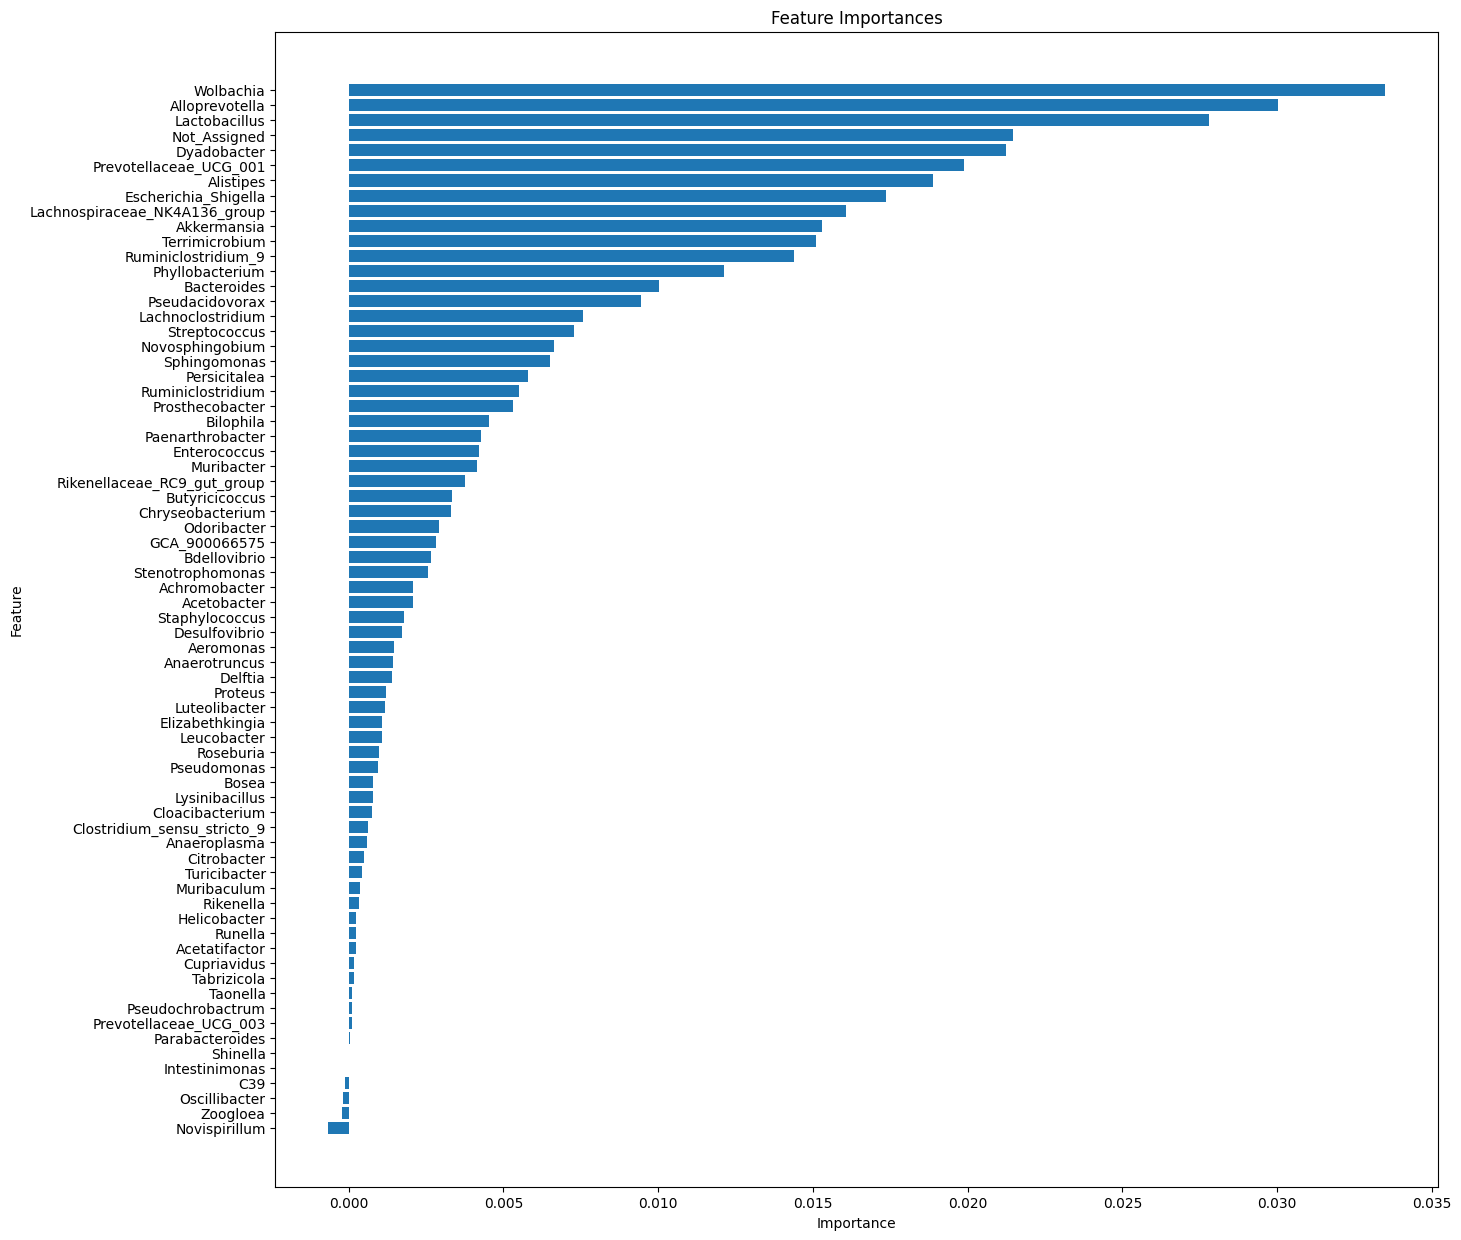

In [110]:
# Read the CSV file
data = pd.read_csv('randomforests_sigfeatures.csv')
# Plot a horizontal bar chart Names,MeanDecreaseAccuracy
data = data.sort_values('MeanDecreaseAccuracy', ascending=True)
# Plot a horizontal bar chart
plt.figure(figsize=(15, 15))
plt.barh(data['Names'], data['MeanDecreaseAccuracy'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')

# Show the plot
plt.show()